In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [3]:
video_game_ratings = pd.read_csv('https://raw.githubusercontent.com/sublue22/video-games-sales-prediction/main/video-game-sales-dataset.csv')

In [4]:
video_game_ratings.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
video_game_ratings2 = video_game_ratings.dropna(subset=['User_Score', 'Critic_Score', 'Year_of_Release'])
video_game_ratings2 = video_game_ratings2[video_game_ratings2['User_Score'] != 'tbd']
video_game_ratings2['User_Score_Numeric'] = pd.to_numeric(video_game_ratings2['User_Score'])
video_game_ratings2['Critic_Score_Numeric'] = pd.to_numeric(video_game_ratings2['Critic_Score'])

In [ ]:
video_game_ratings2['User_Score_Numeric'] = video_game_ratings2['User_Score_Numeric'].apply(lambda x: 10 * x)

In [ ]:
video_game_ratings2['Global_Sales'].head()

0    82.53
2    35.52
3    32.77
6    29.80
7    28.92
Name: Global_Sales, dtype: float64

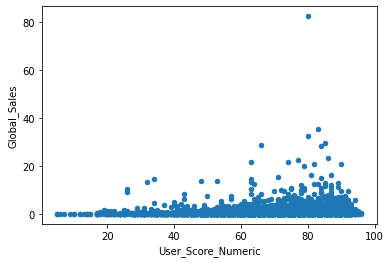

In [ ]:
video_game_ratings2.plot.scatter('User_Score_Numeric', 'Global_Sales')

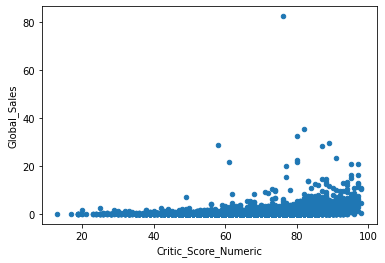

In [ ]:
video_game_ratings2.plot.scatter('Critic_Score_Numeric', 'Global_Sales')

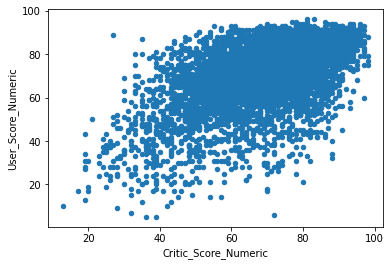

In [ ]:
video_game_ratings2.plot.scatter('Critic_Score_Numeric', 'User_Score_Numeric')

In [ ]:
video_game_ratings2[['User_Score_Numeric', 'Critic_Score_Numeric']].corr()

,User_Score_Numeric,Critic_Score_Numeric
User_Score_Numeric,1.000000,0.579671
Critic_Score_Numeric,0.579671,1.000000


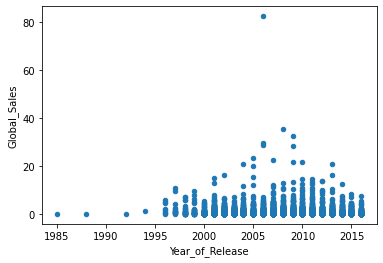

In [ ]:
video_game_ratings2.plot.scatter('Year_of_Release', 'Global_Sales')

In [ ]:
train, test = train_test_split(video_game_ratings2.copy(), random_state=0)

In [ ]:
features = ['User_Score_Numeric']
target = ['Global_Sales']
model = LinearRegression()
model.fit(train[features], train[target])
print(model.coef_,model.intercept_)

y_true_train = train[target]
y_pred_train = model.predict(train[features])
train_error = mean_absolute_error(y_true_train, y_pred_train)

y_true_test = test[target]
y_pred_test = model.predict(test[features])
test_error = mean_absolute_error(y_true_test, y_pred_test)

print([train_error, test_error])

[[0.01213527]] [-0.11201624]
[0.7620945360081418, 0.8202417291191948]


In [ ]:
features = ['Critic_Score_Numeric']
target = ['Global_Sales']
model = LinearRegression()
model.fit(train[features], train[target])
print(model.coef_,model.intercept_)

y_true_train = train[target]
y_pred_train = model.predict(train[features])
train_error = mean_absolute_error(y_true_train, y_pred_train)

y_true_test = test[target]
y_pred_test = model.predict(test[features])
test_error = mean_absolute_error(y_true_test, y_pred_test)

print([train_error, test_error])

[[0.03283348]] [-1.54676995]
[0.7450088755930264, 0.8094858520049031]
